## About dataset:

It is taken from Kaggle. It contains details of matches as well as players till 18th May 2019. The purpose of this dataset is to analyze the performance of all the players playing in Cricket World Cup 2019. 

This dataset contains 6 different files containing batsmen data, bowlers data, ground details related data, ODI matches data and players data. As the given task asks to predict cricket player performance, I will use only batsmen and bowlers data to predict performance of batsmen and bowlers separately. I will consider 'runs' as target variable for prediction of batsmen performance and 'wickets' as target variable for prediction of bowlers performance. Since both of these target variables are continuous, it is a regression problem statement. I will use decision tree regressor to build this model.

Dataset: https://www.kaggle.com/datasets/saivamshi/cricket-world-cup-2019-players-data

## Problem statement:

To predict performance of batsmen through runs scored and that of bowlers through number of wickets taken.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# <div align = "center">  Performance Prediction of Batsmen </div>

## Import data

I have stored the copy of dataset into different variable, namely, 'df_bat'. I will use this variable for model building and use the original variable of stored dataset, i.e. df, for data vizualization since I need categorical values.

In [2]:
#original dataset
df = pd.read_csv("Batsman_Data.csv")

# Storing copy of original data
df_bat = df.copy()

# Viewing data
df_bat.head()

,Unnamed: 0,Bat1,Runs,BF,SR,4s,6s,Opposition,Ground,Start Date,Match_ID,Batsman,Player_ID
0,1,DNB,-,-,-,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Oshane Thomas,49619
1,2,DNB,-,-,-,-,-,v India,Kolkata,24 Dec 2009,ODI # 2935,Oshane Thomas,49619
2,3,DNB,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Oshane Thomas,49619
3,4,DNB,-,-,-,-,-,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Oshane Thomas,49619
4,5,DNB,-,-,-,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Oshane Thomas,49619


## Exploring data

In [3]:
df.columns

Index(['Unnamed: 0', 'Bat1', 'Runs', 'BF', 'SR', '4s', '6s', 'Opposition',
       'Ground', 'Start Date', 'Match_ID', 'Batsman', 'Player_ID'],
      dtype='object')

#### These columns represent the following features:
|Column name|Feature|
|:--------------:|:------------:|
|Unnamed: 0|Serial number|
|Bat1|Whether team of batsman batted or not and if batted, what was his runs' score? The entry 'DNB' means 'Did Not Bat', 'TDNB' means 'Team Did Not Bat', 'absent' means team of batsman was absent in the match, 'sub' means team of batsman was substituted in the match.|
|Runs|Number of runs scored|
|BF|Balls Faced|
|SR|Strike Rate|
|4s|Number of fours hit by batsman|
|6s|Number of sixes hit by batsman|
|Opposition|Opposition team in the match|
|Ground|Ground on which match was played|
|Start Date|Start date of the match|
|Match_ID|ID number of each match|
|Batsman|Name of batsman|
|Player_ID|ID number of each player|

In [4]:
df_bat.shape

(11149, 13)

In [5]:
df_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11149 entries, 0 to 11148
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11149 non-null  int64 
 1   Bat1        11149 non-null  object
 2   Runs        11149 non-null  object
 3   BF          11149 non-null  object
 4   SR          11149 non-null  object
 5   4s          11149 non-null  object
 6   6s          11149 non-null  object
 7   Opposition  11149 non-null  object
 8   Ground      11149 non-null  object
 9   Start Date  11149 non-null  object
 10  Match_ID    11149 non-null  object
 11  Batsman     11149 non-null  object
 12  Player_ID   11149 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [6]:
df_bat.describe()

,Unnamed: 0,Player_ID
count,11149.00000,1.114900e+04
mean,5575.00000,2.259088e+05
std,3218.58341,1.942613e+05
min,1.00000,5.334000e+03
25%,2788.00000,4.749200e+04
50%,5575.00000,2.335140e+05
75%,8362.00000,3.217770e+05
max,11149.00000,1.158100e+06


In [7]:
df_bat.isna().sum()

Unnamed: 0    0
Bat1          0
Runs          0
BF            0
SR            0
4s            0
6s            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Batsman       0
Player_ID     0
dtype: int64

In [8]:
df_bat.duplicated().sum()

0

## Observation:
* There are 11149 rows and 13 columns.
* Except 'Unnamed: 0' and 'Player_ID', data type of all other columns is categorical. 
* There are no null values and neither any duplicate values.

## Data preprocessing

* ### Removing unnecessary columns

Columns 'Start Date', 'Player_ID', 'Unnamed: 0' are not statistically important, hence I am dropping them.

In [9]:
df_bat.drop(['Start Date','Player_ID','Unnamed: 0'], axis = 1, inplace = True)

After careful observation I noticed that, columns 'Bat1' and 'Runs' represent the same data.

In [10]:
Bat1_Runs = pd.concat([df_bat['Bat1'], df_bat['Runs']],axis = 1)
Bat1_Runs.tail(10)

,Bat1,Runs
11139,4,4
11140,42*,42
11141,10*,10
11142,0*,0
11143,15,15
11144,46,46
11145,3,3
11146,1,1
11147,DNB,-
11148,TDNB,-


As both of these are same, I am dropping 'Bat1' column.

In [11]:
df_bat.drop(['Bat1'], axis = 1, inplace = True)

# Viewing data
df_bat.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman
0,-,-,-,-,-,v India,Nagpur,ODI # 2933,Oshane Thomas
1,-,-,-,-,-,v India,Kolkata,ODI # 2935,Oshane Thomas
2,-,-,-,-,-,v India,Delhi,ODI # 2936,Oshane Thomas
3,-,-,-,-,-,v Bangladesh,Dhaka,ODI # 2937,Oshane Thomas
4,-,-,-,-,-,v India,Dhaka,ODI # 2938,Oshane Thomas


In [12]:
# Viewing changed shape of dataset
df_bat.shape

(11149, 9)

Now we have 9 columns in our dataset and 4 of them are categorical. Let's encode them.

* ### Converting categorical features into numerical

We can see that, there are 4 categorical features, namely, "Opposition", "Ground", "Match_ID" and "Batsman", which have string values. I will use label encoder to encode these features. 

In [13]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

df_bat['Opposition']= LE.fit_transform(df_bat['Opposition'])
df_bat['Ground']= LE.fit_transform(df_bat['Ground'])
df_bat['Match_ID']= LE.fit_transform(df_bat['Match_ID'])
df_bat['Batsman']= LE.fit_transform(df_bat['Batsman'])

# Viewing changes in data
df_bat.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman
0,-,-,-,-,-,9,92,759,113
1,-,-,-,-,-,9,78,761,113
2,-,-,-,-,-,9,37,762,113
3,-,-,-,-,-,4,38,763,113
4,-,-,-,-,-,9,38,764,113


We can see that there is '-' present in the first five columns of the dataset. I will replace them with zero. 

In [14]:
df_bat['Runs'].replace({'-':0}, inplace = True)
df_bat['BF'].replace({'-':0}, inplace = True)
df_bat['SR'].replace({'-':0}, inplace = True)
df_bat['4s'].replace({'-':0}, inplace = True)
df_bat['6s'].replace({'-':0}, inplace = True)

# Viewing changes in data
df_bat.head()

,Runs,BF,SR,4s,6s,Opposition,Ground,Match_ID,Batsman
0,0,0,0,0,0,9,92,759,113
1,0,0,0,0,0,9,78,761,113
2,0,0,0,0,0,9,37,762,113
3,0,0,0,0,0,4,38,763,113
4,0,0,0,0,0,9,38,764,113


All the columns are numerical now. Let's check its data type.

In [15]:
df_bat.dtypes

Runs          object
BF            object
SR            object
4s            object
6s            object
Opposition     int32
Ground         int32
Match_ID       int32
Batsman        int32
dtype: object

The first 5 columns are still categrical. I will change its data type using astype() function.

In [16]:
df_bat['Runs']=df_bat['Runs'].astype('int')
df_bat['BF']=df_bat['BF'].astype('int')
df_bat['SR']=df_bat['SR'].astype('float')
df_bat['4s']=df_bat['4s'].astype('int')
df_bat['6s']=df_bat['6s'].astype('int')

Now we are done with our data preprocessing part. The data is ready to be used for building a model. Before that, let's explore it more through data vizualization.

## Data Visualization

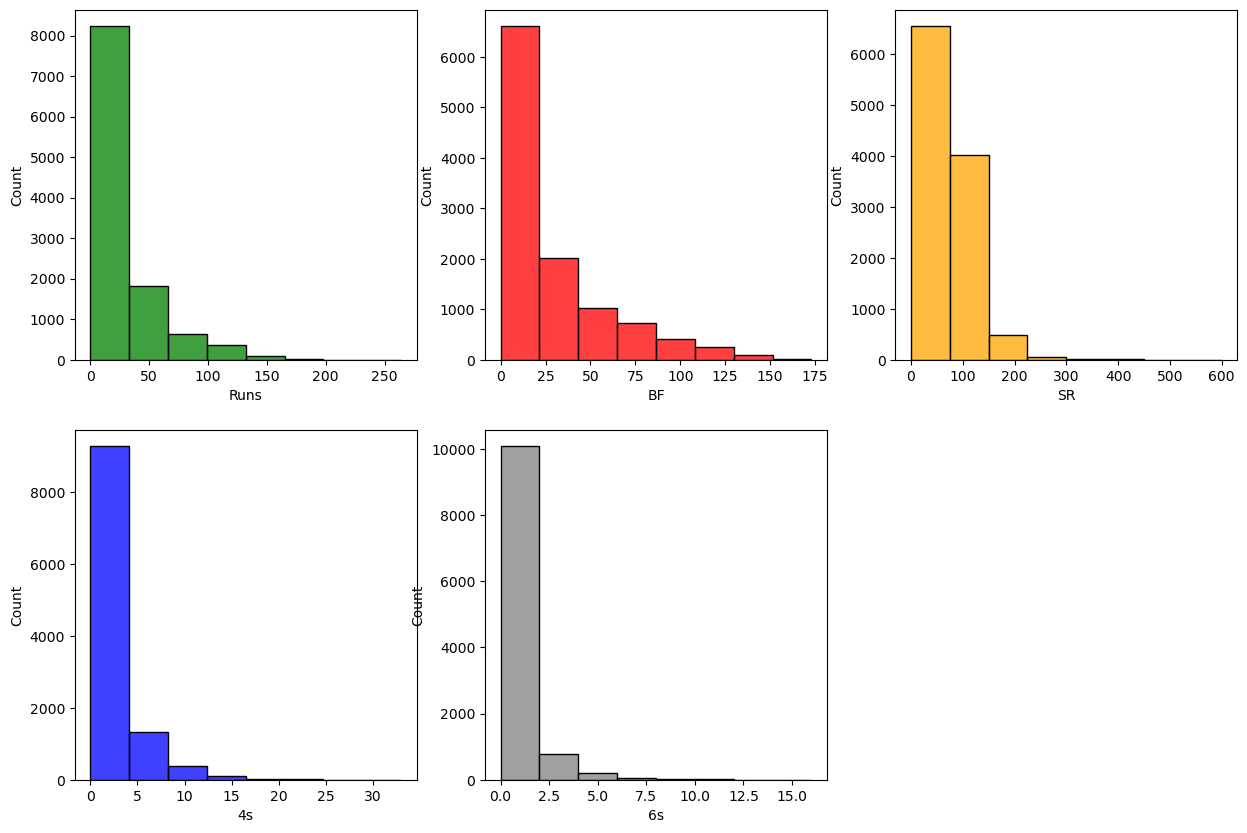

In [17]:
columns = ['Runs','BF', 'SR', '4s', '6s']
color_list = ['green', 'red','orange','blue','gray']
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,3,i+1)
    sns.histplot(df_bat[columns[i]], bins=8, color = color_list[i])

* These histograms give frequency of values in 'Runs', 'BF', 'SR', '4s', '6s' columns.
* 'Runs' column has most values concentrated between 0 to 50.
* 'BF' (balls faced) has most of the values in 0 to 20 range.
* 'SR' (strike rate) has values largely concentrated in the range of 0 to 150.
* The count of players hitting 4s in range of 0 to 4 is more.
* The count of players hitting 6s in range of 0 to 2 is more.

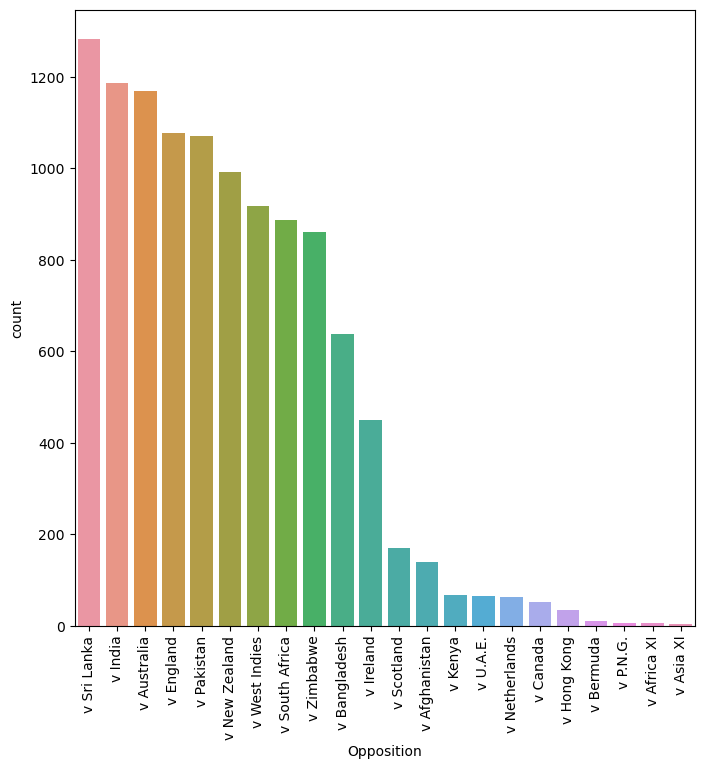

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(df['Opposition'], order=df['Opposition'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Above countplot gives frequency of opposition teams. It can be seen that, the maximum number of matches have been played against Sri Lanka, followed by India and Australia.

I will find the number of matches played on each ground using value_counts() function and then using this data, I will plot pie diagram for top 20 mostly used grounds.

In [19]:
# Number of matches played
ground_seq = df['Ground'].value_counts().sort_values(ascending=False).rename_axis("Ground").reset_index(name = "counts")
ground_seq.head()

,Ground,counts
0,Dhaka,839
1,Harare,372
2,Sharjah,354
3,Abu Dhabi,319
4,Colombo (RPS),317


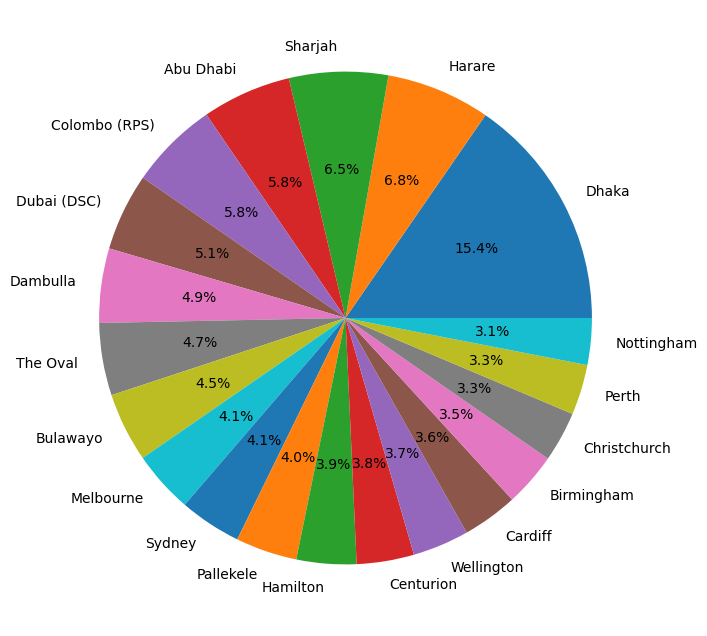

In [20]:
# Pie plot for top 20 mostly used grounds
labels = ground_seq["Ground"]
values = ground_seq["counts"]
plt.figure(figsize=(8,8))
plt.pie(values[0:20], labels = labels[0:20], autopct='%1.1f%%')
plt.show()

The maximum number of matches have been played in Dhaka, followed by Harare and Sharjah.

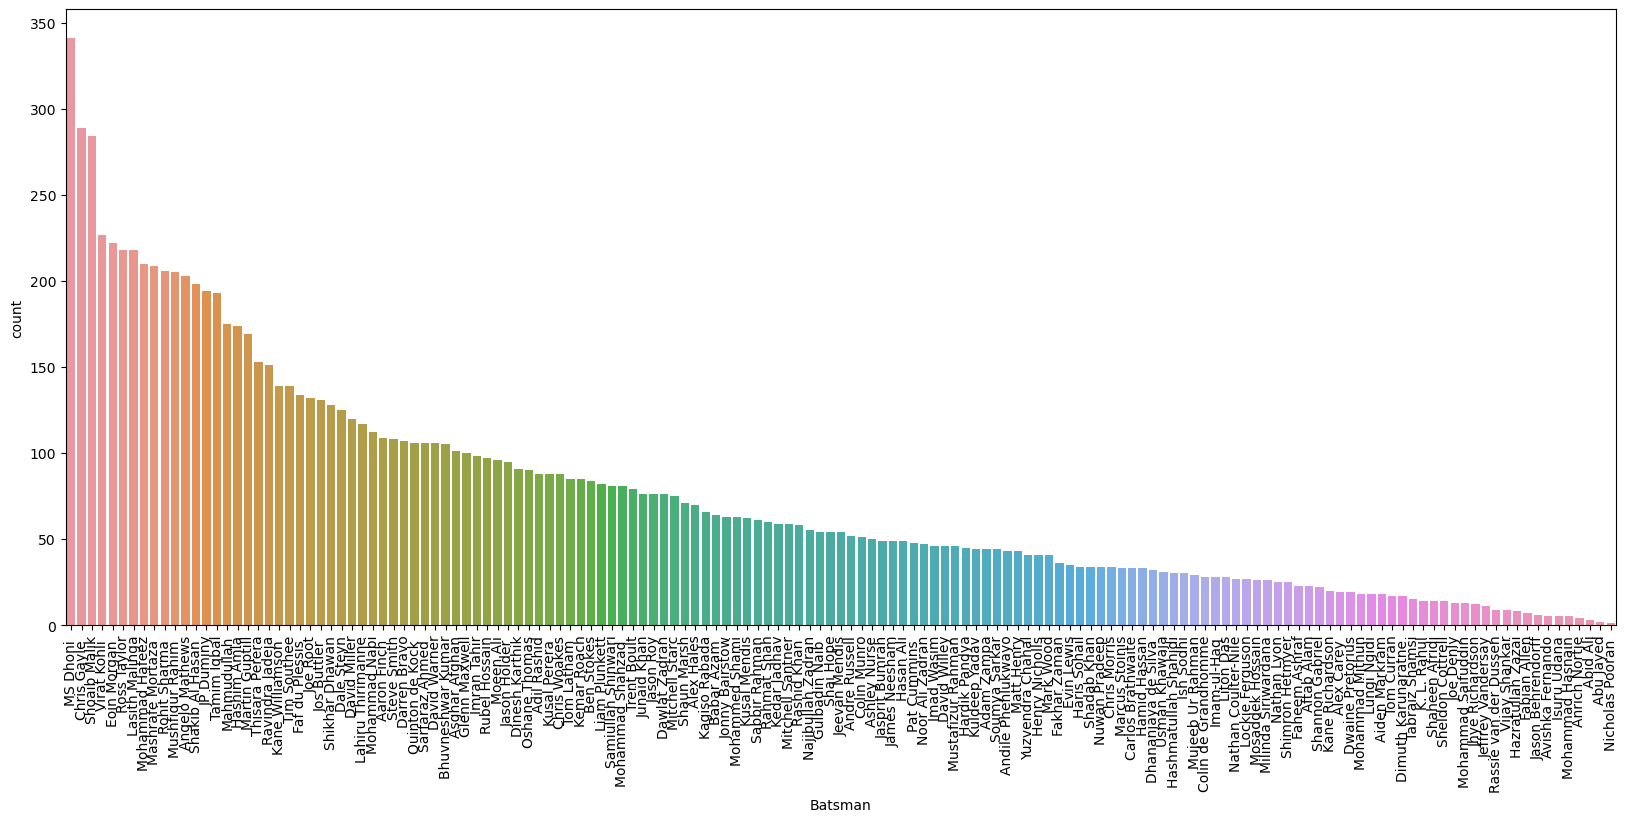

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(df['Batsman'], order=df['Batsman'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Above countplot gives number of matches played by each batsman. It can be seen that, MS Dhoni has played most matches while Nicholas Pooran has played least number of  matches.

<AxesSubplot:>

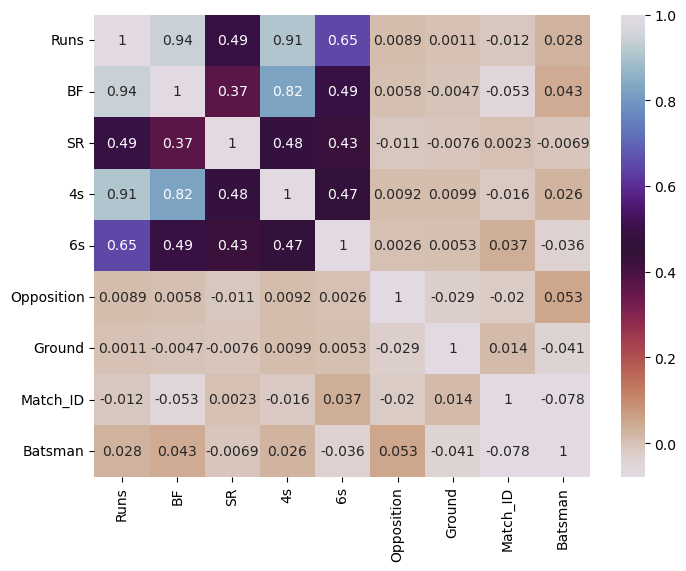

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df_bat.corr(), annot=True, cmap='twilight_r')

This heatmap gives correlation between columns in the range of -1 to 1. It is used for bivariate analysis. Consider our target column, i.e. 'Runs'. It is strongly correlated with 'BF', '4s','6s' and 'SR' while it is weakly correlated with 'Ground' and 'Opposition'.

## Building Model: Decision Tree Regressor

In [23]:
# Define dependent and independent variables
y = df_bat.pop('Runs')
x = df_bat

In [24]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 21)

In [25]:
# Hyperparameter Optimization using GridSearchCV

#estimator
from sklearn.tree import DecisionTreeRegressor
DTC = DecisionTreeRegressor() 

#hyperparameters
parameters = {'criterion': ['squared_error', 'absolute_error'], 
              'splitter':['best','random'], 
              'max_depth' : [1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[1,2,3,4,5,6,7]} 

#initializing model
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(DTC, parameters, cv = 5, n_jobs = -1, verbose = 1)

#fitting training data
gd.fit(x_train,y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [26]:
# Finding best parameters
print('Score of the model: ', gd.best_score_)
print('------------------------------------')
print('Best parameters: \n', gd.best_params_)

Score of the model:  0.9941485254275932
------------------------------------
Best parameters: 
 {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 7, 'splitter': 'best'}


In [27]:
# Fitting best parameters into estimator
DTC = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split= 7, splitter = 'best')
DTC.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=7)

In [28]:
# Prediction
y_pred_bat = DTC.predict(x_test)

In [29]:
# Evaluation of the model using sklearn metrics
from sklearn.metrics import mean_squared_error, r2_score
print('MSE: ', mean_squared_error(y_test, y_pred_bat))
print('R2 score: ', r2_score(y_test, y_pred_bat))

MSE:  3.9198279673389465
R2 score:  0.9958686052655764


#### As the R2 score value is close to 1, our model for prediction of performance of batsman is good and efficient.

# <div align = "center">  Performance Prediction of Bowlers </div>

## Import Data

Here as well I will store the copy of dataset into different variable, namely, 'df_bowler'. I will use this variable for model building and use the original variable of stored dataset, i.e. df1, for data vizualization since I need categorical values.

In [30]:
#original dataset
df1 = pd.read_csv("Bowler_data.csv")

# Storing copy of original data
df_bowler = df1.copy()

# Viewing data
df_bowler.head()

,Unnamed: 0,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Start Date,Match_ID,Bowler,Player_ID
0,1,8.0,0,57,0,7.12,-,-,v India,Nagpur,18 Dec 2009,ODI # 2933,Suranga Lakmal,49619
1,2,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,24 Dec 2009,ODI # 2935,Suranga Lakmal,49619
2,3,-,-,-,-,-,-,-,v India,Delhi,27 Dec 2009,ODI # 2936,Suranga Lakmal,49619
3,4,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,4 Jan 2010,ODI # 2937,Suranga Lakmal,49619
4,5,8.0,1,48,0,6.00,-,-,v India,Dhaka,5 Jan 2010,ODI # 2938,Suranga Lakmal,49619


## Exploring data

In [31]:
df_bowler.columns

Index(['Unnamed: 0', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'Ave', 'SR',
       'Opposition', 'Ground', 'Start Date', 'Match_ID', 'Bowler',
       'Player_ID'],
      dtype='object')

#### These columns represent the following features:
|Column name|Feature|
|:--------------:|:------------:|
|Unnamed: 0|Serial number|
|Overs|Number of overs bowled|
|Mdns|Number of maiden overs bowled|
|Runs|Number of runs conceded|
|Wkts|Number of wickets taken|
|Econ|Average number of runs conceded per over|
|Ave|Average number of runs conceded per wicket|
|SR|Strike Rate|
|Opposition|Opposition team in the match|
|Ground|Ground on which match was played|
|Start Date|Start date of the match|
|Match_ID|ID number of each match|
|Bowler|Name of bowler|
|Player_ID|ID number of each player|

In [32]:
df_bowler.shape

(11118, 14)

In [33]:
df_bowler.describe()

,Unnamed: 0,Player_ID
count,11118.000000,1.111800e+04
mean,5559.500000,2.254082e+05
std,3209.634481,1.936517e+05
min,1.000000,5.334000e+03
25%,2780.250000,4.557200e+04
50%,5559.500000,2.335140e+05
75%,8338.750000,3.217770e+05
max,11118.000000,1.158100e+06


In [34]:
df_bowler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11118 non-null  int64 
 1   Overs       11118 non-null  object
 2   Mdns        11118 non-null  object
 3   Runs        11118 non-null  object
 4   Wkts        11118 non-null  object
 5   Econ        11118 non-null  object
 6   Ave         11118 non-null  object
 7   SR          11118 non-null  object
 8   Opposition  11118 non-null  object
 9   Ground      11118 non-null  object
 10  Start Date  11118 non-null  object
 11  Match_ID    11118 non-null  object
 12  Bowler      11118 non-null  object
 13  Player_ID   11118 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 1.2+ MB


In [35]:
df_bowler.isnull().sum()

Unnamed: 0    0
Overs         0
Mdns          0
Runs          0
Wkts          0
Econ          0
Ave           0
SR            0
Opposition    0
Ground        0
Start Date    0
Match_ID      0
Bowler        0
Player_ID     0
dtype: int64

In [36]:
df_bowler.duplicated().sum()

0

## Observation:
* There are 11118 rows and 14 columns.
* Except 'Unnamed: 0' and 'Player_ID', data type of all other columns is categorical. 
* There are no null values and neither any duplicate values.

## Data preprocessing

* ### Removing unnecessary columns
Columns 'Start Date', 'Player_ID', 'Unnamed: 0' are not statistically important, hence I am dropping them.

In [37]:
df_bowler.drop(['Start Date','Player_ID','Unnamed: 0'], axis = 1, inplace = True)

# Viewing data
df_bowler.head()

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler
0,8.0,0,57,0,7.12,-,-,v India,Nagpur,ODI # 2933,Suranga Lakmal
1,10.0,0,55,2,5.50,27.50,30.0,v India,Kolkata,ODI # 2935,Suranga Lakmal
2,-,-,-,-,-,-,-,v India,Delhi,ODI # 2936,Suranga Lakmal
3,9.0,1,63,2,7.00,31.50,27.0,v Bangladesh,Dhaka,ODI # 2937,Suranga Lakmal
4,8.0,1,48,0,6.00,-,-,v India,Dhaka,ODI # 2938,Suranga Lakmal


In [38]:
# Viewing changed shape of dataset
df_bowler.shape

(11118, 11)

Now we have 11 columns in our dataset and 4 of them are categorical. Let's encode them.

* ### Converting categorical features into numerical

We can see that, there are 4 categorical features, namely, "Opposition", "Ground", "Match_ID" and "Batsman", which have string values. I will use label encoder to encode these features. 

In [39]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()

df_bowler['Opposition']= LE.fit_transform(df_bowler['Opposition'])
df_bowler['Ground']= LE.fit_transform(df_bowler['Ground'])
df_bowler['Match_ID']= LE.fit_transform(df_bowler['Match_ID'])
df_bowler['Bowler']= LE.fit_transform(df_bowler['Bowler'])

# Viewing changes in data
df_bowler.head()

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler
0,8.0,0,57,0,7.12,-,-,9,92,759,138
1,10.0,0,55,2,5.50,27.50,30.0,9,78,761,138
2,-,-,-,-,-,-,-,9,37,762,138
3,9.0,1,63,2,7.00,31.50,27.0,4,38,763,138
4,8.0,1,48,0,6.00,-,-,9,38,764,138


We can see that there is '-' present in the first 7 columns of the dataset. I will replace them with zero. 

In [40]:
df_bowler['Overs'].replace({'-':0}, inplace = True)
df_bowler['Runs'].replace({'-':0}, inplace = True)
df_bowler['Mdns'].replace({'-':0}, inplace = True)
df_bowler['Wkts'].replace({'-':0}, inplace = True)
df_bowler['Econ'].replace({'-':0}, inplace = True)
df_bowler['Ave'].replace({'-':0}, inplace = True)
df_bowler['SR'].replace({'-':0}, inplace = True)

# Viewing changes in data
df_bowler.head()

,Overs,Mdns,Runs,Wkts,Econ,Ave,SR,Opposition,Ground,Match_ID,Bowler
0,8.0,0,57,0,7.12,0,0,9,92,759,138
1,10.0,0,55,2,5.50,27.50,30.0,9,78,761,138
2,0,0,0,0,0,0,0,9,37,762,138
3,9.0,1,63,2,7.00,31.50,27.0,4,38,763,138
4,8.0,1,48,0,6.00,0,0,9,38,764,138


All columns are numerical. Let's check its data type.

In [41]:
df_bowler.dtypes

Overs         object
Mdns          object
Runs          object
Wkts          object
Econ          object
Ave           object
SR            object
Opposition     int32
Ground         int32
Match_ID       int32
Bowler         int32
dtype: object

Though data is numerical, data type of column is still categorical. I will convert its data type using astype() function.

In [42]:
df_bowler['Overs'] = df_bowler['Overs'].astype('float')
df_bowler['Mdns'] = df_bowler['Mdns'].astype('int')
df_bowler['Runs'] = df_bowler['Runs'].astype('int')
df_bowler['Wkts'] = df_bowler['Wkts'].astype('int')
df_bowler['Econ'] = df_bowler['Econ'].astype('float')
df_bowler['Ave'] = df_bowler['Ave'].astype('float')
df_bowler['SR'] = df_bowler['SR'].astype('float')

Now we are done with our data preprocessing. The data is ready to be used for model building. Before that, let's explore it more through data vizualization.

## Data vizualization

Note that, the columns 'Opposition' and 'Ground' are common two both batsmen and bowlers data. Hence the data vizualization would also be same for both of them.

I will find data distribution of first 7 columns through violin plots. Then I will find the number of matches played by each bowler using countplot. Finally, I will plot heatmap to find correlation of target variable (here, 'Wkts') with other features.

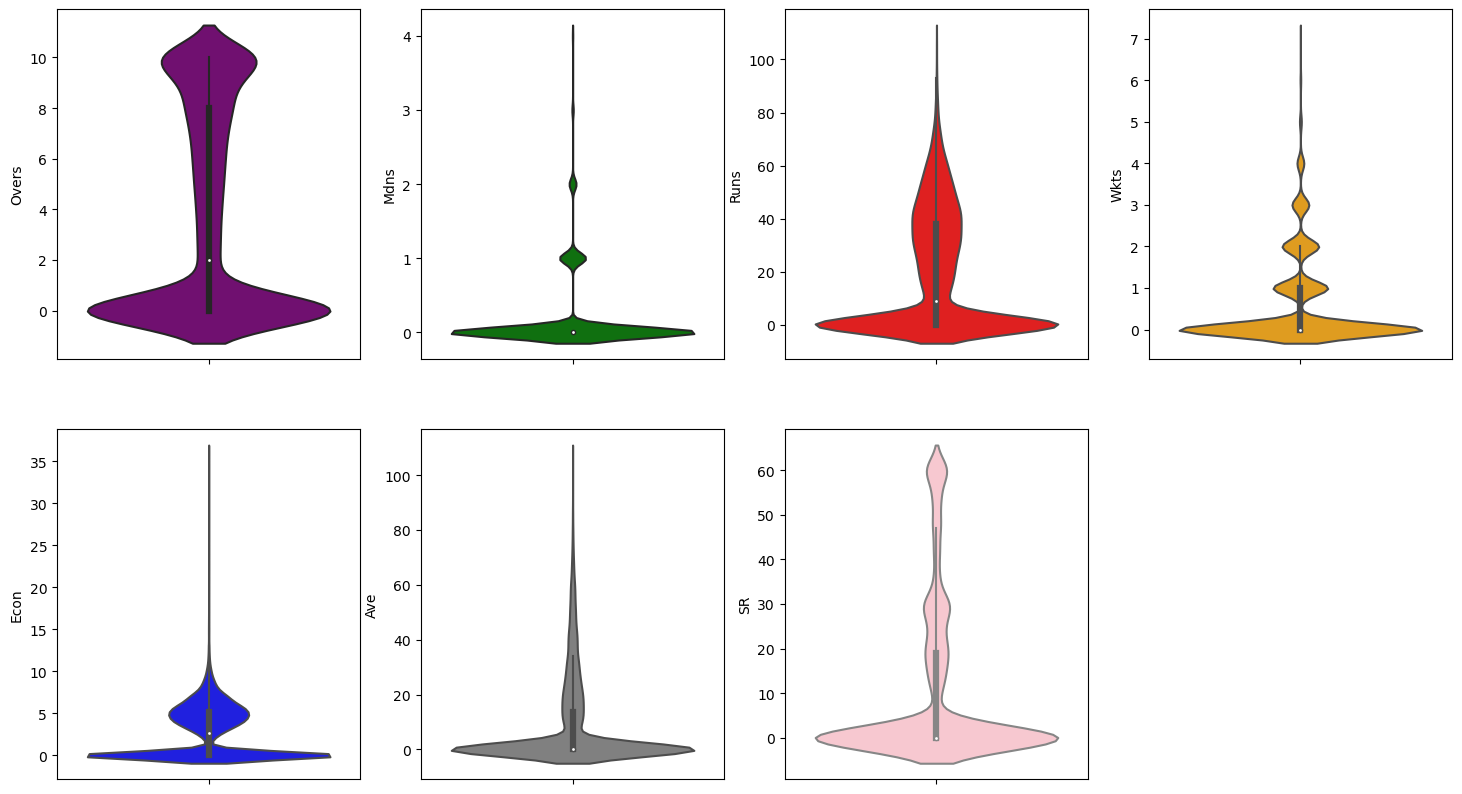

In [43]:
columns1 = ['Overs', 'Mdns', 'Runs', 'Wkts', 'Econ', 'Ave', 'SR']
color_list1 = ['purple', 'green', 'red','orange','blue','gray','pink']
plt.figure(figsize=(18,10))
for i in range(7):
    plt.subplot(2,4,i+1)
    sns.violinplot(y=df_bowler[columns1[i]], color = color_list1[i])

* Above violin plots give distribution of data for each feature. 
* There are many bowlers who bowled for 0 - 1 and 9 - 10 overs.
* Mdns feature has discontinuous data.
* The runs conceded are largely concentrated in 0 to 10 and 30 to 50 range.
* Many bowlers do not take a single wicket.
* The average runs conceded per over (Econ) is mostly in the range of 0 to 10.
* The average runs conceded per wicket (Ave) is mostly in the range of 0 to 5.
* The strike rate values are mostly concentrated in range of 0 to 10.

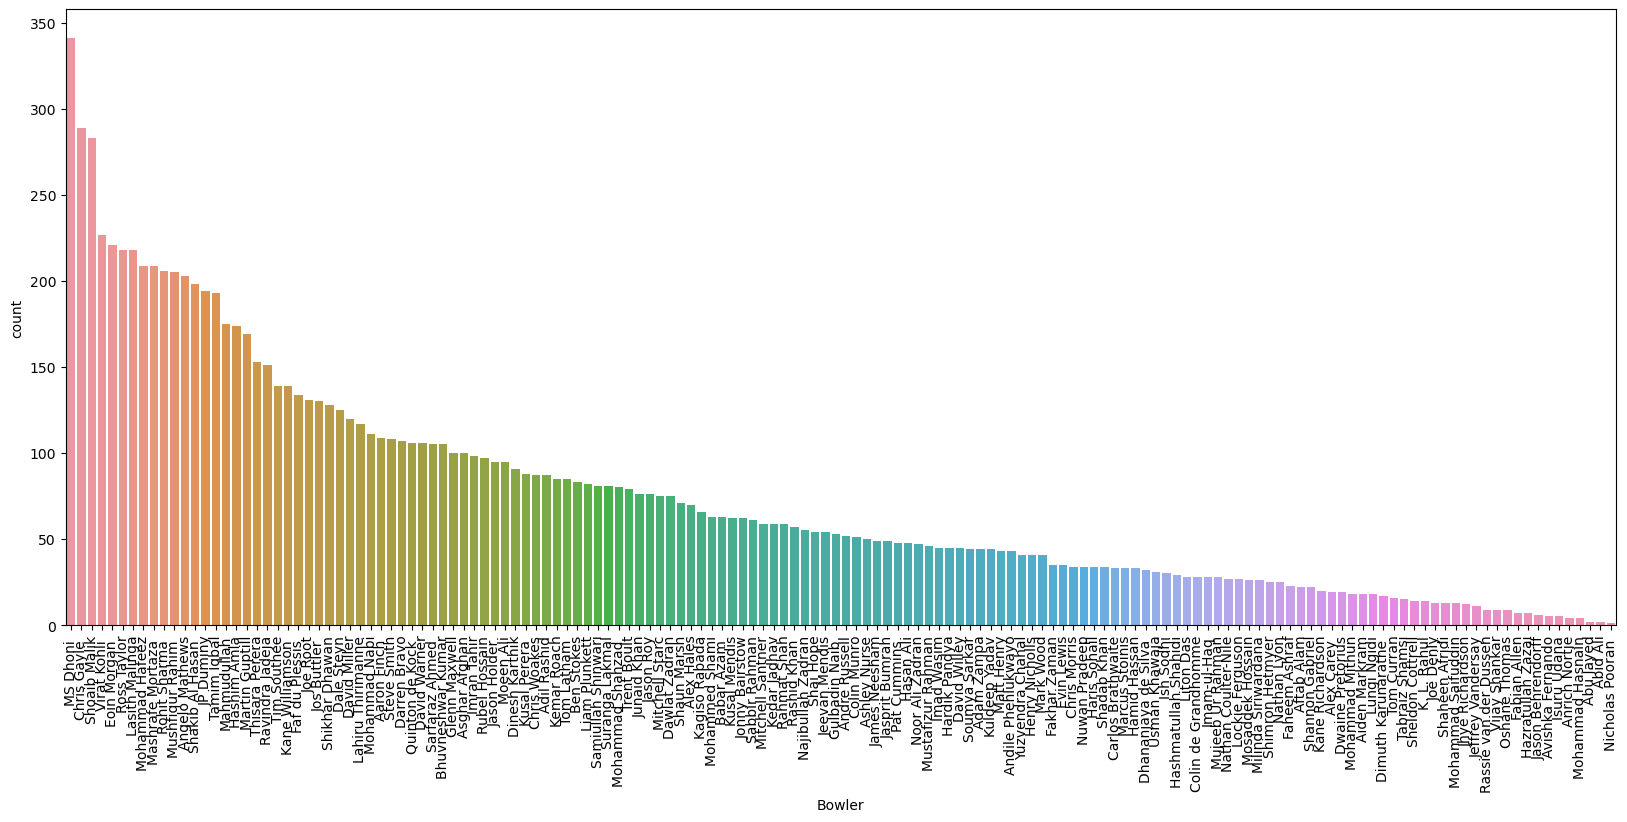

In [44]:
plt.figure(figsize=(20,8))
sns.countplot(df1['Bowler'], order = df1['Bowler'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Above countplot shows that MS Dhoni has bowled in most number of matches.

<AxesSubplot:>

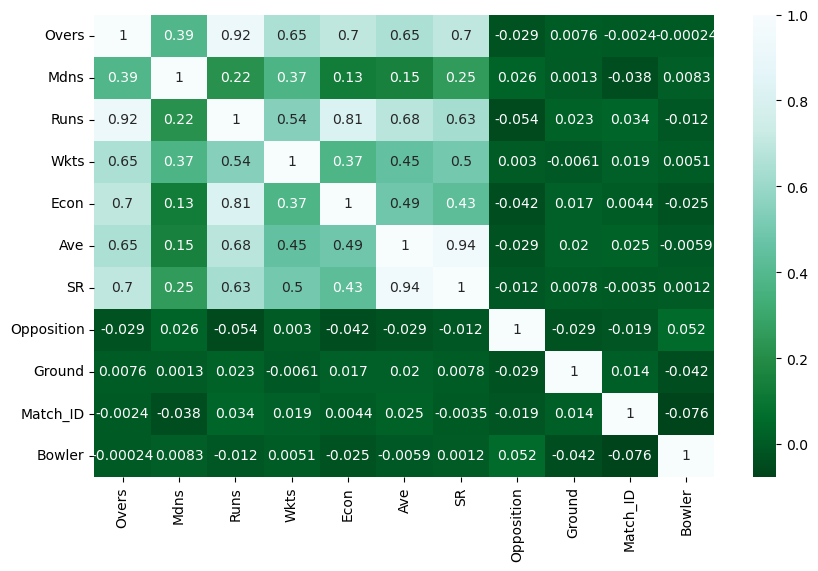

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df_bowler.corr(), annot=True, cmap='BuGn_r')

Above heatmap shows that, the target feature, namely, 'Wkts' is strongly correlated to 'Overs' and weakly correlated to 'Ground'.

## Building Model: Decision Tree Regressor

In [46]:
# Define dependent and independent variables
Y = df_bowler.pop('Wkts')
X = df_bowler

In [47]:
# Splitting data into training and testing data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.35, random_state = 8)

In [48]:
# Hyperparameter Optimization using GridSearchCV

#estimator
from sklearn.tree import DecisionTreeRegressor
DTC = DecisionTreeRegressor() 

#hyperparameters
parameters = {'criterion': ['squared_error', 'absolute_error'], 
              'splitter':['best','random'], 
              'max_depth' : [1,2,3,4,5,6,7,8,9,10],
              'min_samples_split':[1,2,3,4,5,6,7]} 

#initializing model
from sklearn.model_selection import GridSearchCV
gd = GridSearchCV(DTC, parameters, cv = 5, n_jobs = -1, verbose = 1)

#fitting training data
gd.fit(xtrain,ytrain)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [49]:
# Finding best parameters
print('Score of the model: ', gd.best_score_)
print('------------------------------------')
print('Best parameters: \n', gd.best_params_)

Score of the model:  0.9967841947212481
------------------------------------
Best parameters: 
 {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 3, 'splitter': 'best'}


In [50]:
# Fitting best parameters into estimator
DTC1 = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split= 3, splitter = 'best')
DTC1.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=10, min_samples_split=3)

In [51]:
# Prediction
y_pred_bowler = DTC1.predict(xtest)

In [52]:
# Evaluation of the model using sklearn metrics
print('MSE: ', mean_squared_error(ytest, y_pred_bowler))
print('R2 score: ', r2_score(ytest, y_pred_bowler))

MSE:  0.007451181911613566
R2 score:  0.9935908894642509


#### As the R2 score value is close to 1, our model for prediction of performance of bowlers is good and efficient.